In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math 
import seaborn as sns

# Nombre Gregorio Aarón Meza Ramos


# Ejercicio 1 
Se anuncia un corte de luz en su sector de la ciudad, por lo cual usted decide cargar 4 baterías para un cierto dispositivo electrónico. Los tiempos que tardan en cargarse son: 5 horas, 3 horas, 1 hora y 1 hora, y usted las va a cargar una después de otra en ese orden. Suponiendo que el
tiempo que tarda en cortarse la luz es una variable aleatoria exponencial de parémetro $\lambda= 6$, utilice simulación para calcular la cantidad media de baterías que quedan completamente cargadas antes del corte.

**Solución**

Con ayuda de la libreria **numpy** vamos a generar números pseudoaleatorios provenientes de una distribución exponencial.

In [2]:
'''
Se empieza haciendo una unica simulación 
'''
lambdaValue = 6 #El parametro de lambda de la variable aleatoria exponencial
tiempo_baterias = [5,3,1,1] # Tiempos dados por el problema, el primero corresponde al tiempo en que carga completamente la bateria 1 y así sucesivamente
tiempo_corte = np.random.exponential(lambdaValue) #variable aleatoria exponencial
tiempo_acumulado = 0
baterias_cargadas = 0
'''
El código que viene abajo es la simulación como tal, empezando con un ciclor for, donde voy iterando los tiempos de carga de
las respectivas baterias. y le sumamos a tiempo_acumulado lo que vale el primer tiempo de carga de la bateria hecho
esto verificamos si el tiempo de corte es menor al acumulado si es cierto pasas de ese tiempo que quiere decir que no te da 
para cargar la primer bateria, de caso contrario sumas 1 a la variable baterias cargadas
'''
for tiempo in tiempo_baterias:
  tiempo_acumulado += tiempo
  if tiempo_corte< tiempo_acumulado:
    continue
  else:
    baterias_cargadas += 1
print(tiempo_corte)
print(baterias_cargadas)

0.49772842913573534
0


In [3]:
'''

se procede a hacer la simulación 100000  veces
'''
#Declaración de variables

lambdaValue = 6 #El parametro de lambda de la variable aleatoria exponencial
tiempo_baterias = [5,3,1,1] # Tiempos dados por el problema, el primero corresponde al tiempo en que carga completamente la bateria 1 y así sucesivamente
tiempo_corte = np.random.exponential(lambdaValue) #variable aleatoria exponencial
tiempo_acumulado = 0
baterias_cargadas = 0


lista_baterias_cargadas = []
for i in range(100000):
  tiempo_corte = np.random.exponential(lambdaValue) #variable aleatoria exponencial
  tiempo_acumulado = 0
  baterias_cargadas = 0

  for tiempo in tiempo_baterias:
    tiempo_acumulado += tiempo
    if tiempo_corte < tiempo_acumulado:
      continue
    else:
      baterias_cargadas += 1
  lista_baterias_cargadas.append(baterias_cargadas)

media = np.mean(lista_baterias_cargadas)
print(f'La cantidad media de baterias cargadas es {media}')

La cantidad media de baterias cargadas es 1.10627


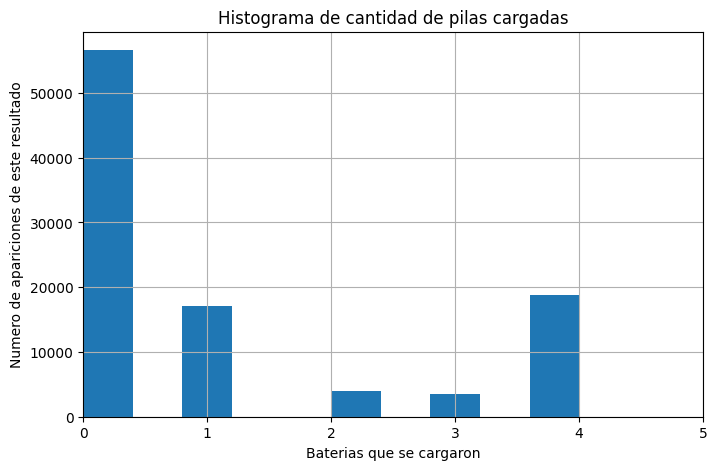

In [4]:
#podemos verlo con una grafica
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(lista_baterias_cargadas, bins = 10)
plt.xlim(0,5)
plt.ylabel('Numero de apariciones de este resultado')
plt.xlabel('Baterias que se cargaron')
plt.title("Histograma de cantidad de pilas cargadas")
plt.grid()
plt.show()

Concluyendo el ejercicio notamos que la cantidad media de baterias que serán cargadas es cero.

Ahora usando el Teorema de la función Inversa. Sabemos que la función de acumulación de una variable aleatoria exponencial es.

$$   F(z) = 1 - e^{-\lambda z} $$
Y entonces su función inversa de la acumulada es:
$$  F^{-1}(u) = -\frac{1}{\lambda} ln(1-u)$$
Donde los valores de $u$ son provenientes de una distibución uniforme entre 0 y 1.


Ahora la implementamos como función de python

In [5]:
'''
Declaración de la función inversa de acumulación de una variable aleatoria exponencial'''
def exponencial_inversa(lambda_value):
    u = random.random()
    return (np.log(1 - u ))/-lambda_value
#Parametros que usaremos
l = 6
num_muestras = 100

# Generar muestras de la distribución de Exponencial
muestras_exponencial = [exponencial_inversa(l) for _ in range(num_muestras)]
print('Media de número de baterias cargadas completamente antes del corte: ' + str(sum(muestras_exponencial)/ len(muestras_exponencial)))

Media de número de baterias cargadas completamente antes del corte: 0.1447491881608342


Y aquí afirmamos la conclusión que hicimos con el primer método con ayuda numpy para generar numeros aleatorios provenientes de una distribución exponencial. De esta forma lo que significa que en promedio ninguna bateria se alcanza a cargar por completo.

# Ejercicio 2 
Una distribución de probabilidad muy útil es la Distribución de Pareto, que debe su nombre al sociólogo, economista y filósofo italiano Vilfredo Pareto. Dado el parámetro de forma $\alpha > 0$ y de escala $k >0$, la función de densidad de  probabilidad de una variable $X$ con distribución de Pareto$(\alpha, k)$ está dada por
$$
f_X(x)= \frac{\alpha k^\alpha}{x^{\alpha + 1}}\mathbb{1}_{[k,+\infty)}(x).
$$

- Investigue que tipo de situaciones son modeladas usando esta distribución.
- Usando el teorema de la función inversa,
$$
F^{-1}_X(U)=X
$$
programa una función que simule una variable aleatoria con distribución Pareto. Recuerden que su función de distribución está dada por:
$$
F(x) =\Bigg \{ \begin{matrix} 0 \quad &si \quad x < k\\
1-\left(\frac{k}{x}\right)^{\alpha} \quad &si \quad x \ge k\\
\end{matrix}
$$


**Investigación. Para qué tipo de situaciones es utilizada la distribución Pareto**

Esta distribución tiene las siguientes aplicaciones :

- Los tamaños de los asentamientos humanos (pocas ciudades, muchas aldeas/pueblos)
- Distribución de los tamaños de los archivos del tráfico de Internet que utiliza el protocolo TCP
- Tasas de error en los Unidades de disco duro
- Clusters de condensado de Bose-Einstein cerca del cero absoluto
- Los valores de las reservas de petróleo en los yacimientos petrolíferos
- La distribución de la longitud en los trabajos asignados a los superordenadores
- La rentabilidad estandarizada de los precios de las acciones individuales
- Los tamaños de las partículas de arena
- El tamaño de los meteoritos



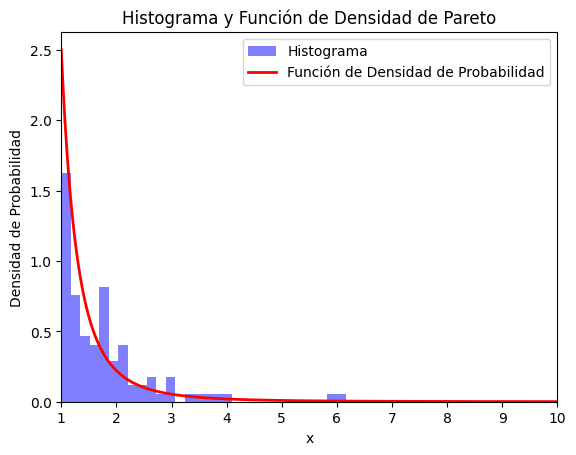

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

def pareto_inversa(alpha, k):
    u = random.random()
    return k * (1 - u)**(-1/alpha)

# Parámetros de forma y escala
alpha = 2.5
k = 1.0
num_muestras = 100
n = 10  # Cambia este valor a tu preferencia

# Generar muestras de la distribución de Pareto
muestras_pareto = [pareto_inversa(alpha, k) for _ in range(num_muestras)]

# Filtrar muestras para que estén por debajo de n
muestras_pareto = [x for x in muestras_pareto if x < n]

# Crear un rango de valores x hasta n
x = np.linspace(k, n, 1000)

# Calcular la función de densidad de probabilidad de Pareto
pdf_pareto = alpha * (k**alpha) / x**(alpha + 1)

# Crear histograma
plt.hist(muestras_pareto, bins=30, density=True, alpha=0.5, color='b', label='Histograma')

# Graficar la función de densidad de probabilidad
plt.plot(x, pdf_pareto, 'r-', lw=2, label='Función de Densidad de Probabilidad')

# Configurar límites del eje x
plt.xlim([k, n])

# Configuraciones del gráfico
plt.xlabel('x')
plt.ylabel('Densidad de Probabilidad')
plt.title('Histograma y Función de Densidad de Pareto')
plt.legend()

# Mostrar el gráfico
plt.show()


Uno de los resultados más importantes en la teoria de la probabilidad es **la ley débil de los grandes números.** <br>
Lo que nos dice la ley débil de los grandes números es que si tenemos una sucesión de variables aleatorias $X_1 ,X_2 ,...,X_n$ independientes e identicamente distribuidas, entonces su promedio
$$
\lim_{n\rightarrow\infty}\frac{1}{n}\sum_{i=1}^nX_i\rightarrow E[X_i]
$$
**converge en probabilidad a la esperanza** de las variabales aleatorias cuando n tiende a infinito.<br>
En este ejercicio deberán programar una función que nos ayude a visualizar este resultado. <br>
Su función debera recibir:
- Una lista de valores
- Calcular los promedios parciales de estos datos
$$
S_k=\frac{1}{k}\sum_{i=1}^kx_i\qquad k\in\{1,..,N\}
$$
- Graficar los valores calculados de los promedios parciales.

Prueben su función generando una lista de 200 valores aleatorios provenientes de una distribición pareto(1,3),usando datos de una simulación. A tu gráfica anterior agregale la linea constante $y=\frac{\alpha k}{\alpha -1}=\frac{3}{2}$

**Solución:**


Para proponer una solución para este ejercicio vamos a hacer una implementación de una función en Python que reciba como entradas una muestra de valores, y por cada elemento que hay en la muestra iremos calculando promedios parciales de estos. 
Por ejemplo si tenemos 4 datos en nuestra lista entonces tendremos 4 promedios parciales, en el primero solo sumaremos el primer elemento y lo dividimos por 1 por qué estamos tomando un sólo elemento, para lo siguiente tomamos dos datos, luego los sumamos y dividimos por 2 y así sucesivamente hasta acabarnos todos los números en la lista.

In [7]:
'''
La función tiene como parametros a una lista de valores
Definimos una lista s_k que ira guardando los promedios parciales
el primero for nos sirve para in recorriendo los elementos de la muestra
Para fijar ideas:
en el primer for, k = 0, se crea la variable suma que vale 0, dentro del primer for está otro for que nos ayuda para ir 
accediendo a los valores de la muestra donde nuestro tope es k, seguimos sumando hasta que lleguemos a k, Cuando se 
termina este for agregamos a la lista s_k la suma divida entre k + 1
Así iremos llenando nuestra lista de promedios parciales
'''
def leyDebilGrandesNumeros(valores):
    #Lista que almacena los promedios parciales
    s_k = [] 
    for k in range(0, len(valores)):
        suma = 0
        for i in range(0, k + 1):
            suma = suma + valores[i]
        s_k.append(suma/(k+1))
    
    '''

    Apartado de Graficación 
    '''
    k = [k + 1 for k in range(0, len(valores))]
    #return s_k
    plt.plot(k,s_k, label = 'Promedios Parciales')
    plt.plot(k,[3/2 for x in k], color = 'r', label = 'y = 3/2')
    plt.xlabel('k')
    plt.ylabel('Promedios parciales')
    plt.title('Visualización de la Ley Débil de los Grandes Números')
    plt.grid(True)
    plt.legend()

    plt.show()

In [8]:
'''
A continuación generamos una lista de números aleatorios provenientes de una 
distribución pareto(1,3)

'''
a, m = 1., 3. 
s = np.random.pareto(a, 200) + m

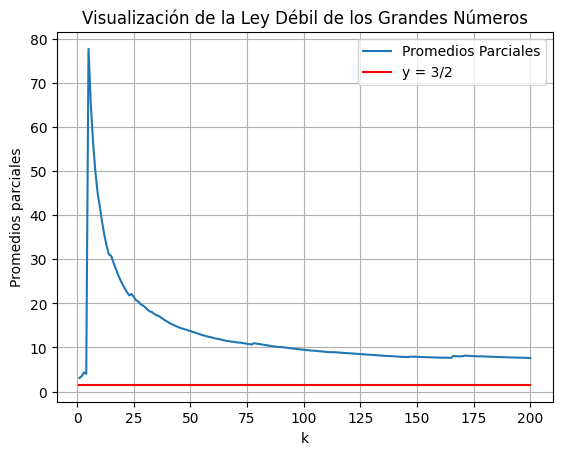

In [9]:
leyDebilGrandesNumeros(s)

**Conclusiones**


Lo primero que notamos es que no importa cuantas veces repitamos la generación de los numeros aleatorios al momento de graficarlos la curva no pasa por debajo de $y =  \frac{3}{2}$. Otra cosa que cabe notar es que los datos se pegan mucho más a la izquierda es decir para valores más pequeños hay más ajuste de los datos mientras que para los de la derecha están  mas distribuidos. Además que se describe una función no monótona

Otro resultado importante es el **Teorema (Teorema del Límite Central):**
Sea $X_1 ,X_2 ,...$ una sucesión infinita de variables aleatorias independientes e idénticamente distribuidas con **media** $μ$ y **varianza finita** $σ^2$ . Entonces la función de distribución de la variable aleatoria
$$
Z_n = \frac{(X_1+\cdots +X_n) - n\mu}{\sqrt{n\sigma^2}}
$$
tiende a la función de distribución **normal estándar** cuando $n$ tiende a infinito. 

- Crea una función que calcule la variable aleatoria Z del teorema del límite central. Su función deberá recibir como parámetros una lista con una muestra de variables aleatorias identicamente distribuidas, un real que represente $\mu$ y un real que represente $σ^2$ y deberá regresar el valor de Z. 

**Implementacion:**

Vamos a construir una función que reciba como parametrosa una muestra o lista de valores, la media y la varianza, como la muestra es de variables aleatorias independientes e identicamente distribuidas la media y varianza es la misma para todas. La función te va a regresar una valor  proveniente de una distribución normal estandar para valores muy grandes de $n$. Basicamente sumamos todos los elementos de la muestra de entrada le restamos el tamaño de la muestra por su media y dividimos por la raíz cuadra del tamaño de la muestra por su varianza


In [10]:
'''
Construcción de la función
Recibiendo como parámetros a:
muestra: lista de variables aleatorias identicamente distribuidas
mu: media
sigmaCuadrada: varianzaa finita
'''
def LimiteCentral(muestra, mu, sigmaCuadrada):
    return (np.sum(muestra) - len(muestra)*mu)/(math.sqrt(len(muestra)*sigmaCuadrada))

1. Generar 1,000 variables aleatorias
$$
Z_n = \frac{\sum_{i=1}^nX_i - n\mu}{\sqrt{n\sigma^2}}\qquad n =1000
$$
donde $X_i$ son variables aleatorias independientes identicamente distibuidas.
2. Graficar el histograma de las variables aleatorias $Z_n$. 
3. Graficar sobre el histograma la función de densidad de la normal estándar.
$$
f_{normal}(x;\mu,\sigma ^2)=\frac{1}{\sqrt{2\pi \sigma ^2}}e^{\frac{-(x-\mu )^2}{2\sigma ^2}}\qquad x\in(-\infty ,\infty)
$$
**NOTA**<br>
$$
X\sim Pareto(\alpha,k) \Rightarrow E[X]=\frac{\alpha k}{\alpha-1}\quad \alpha>1,\qquad Var[X]=\frac{\alpha k^2}{(\alpha-1)^2(\alpha-2)}\quad \alpha>2\\
$$
Si no esta determinada la esperanza o varianza usa la estimación muestral: 
$$
\mu = \frac{1}{n}\sum_{i=1}^nx_i \qquad \sigma^2= \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2
$$

Hagalo para diferentes valores de $\alpha$ y $k$

A continucación presentamos un caso donde la esperanda y varianza no están determinadas por lo tanto hacemos uso de la estimación muestral. Usando los siguientes valores $ \alpha = 1$ y $k = 3$

In [11]:
alpha, k = 1., 3. 
variablesZetas = []
for i in range(0, 1000):
    muestra1 = np.random.pareto(alpha, 1000) + k
    #Estimación muestral para calcular la esperanza y varianza
    mu1 = sum(muestra1)/len(muestra1)
    sigma1 = sum([(a - mu1)**2 for a in muestra1])/len(muestra1)
    variablesZetas.append(LimiteCentral(muestra1,mu1,sigma1))
print(variablesZetas)
print(max(variablesZetas))

[9.901553222557785e-16, -4.1091277119780097e-16, 2.598960839395858e-16, -1.3365894517184555e-14, -5.070037669339575e-15, 7.995502543190148e-15, -1.3756046770885227e-15, -2.361037184673409e-15, -9.91321307902882e-15, 2.742865413839147e-15, 3.965768929292345e-15, 2.1272960838620192e-15, 1.7769464682951494e-15, -3.061594556097153e-15, -4.967411640717795e-15, -1.191654157338279e-15, 1.1597195091580577e-14, 3.0371631645632725e-15, -1.3222031529075972e-14, 2.364184040940667e-15, 4.4066903930697657e-16, -8.168050144002405e-15, -6.228706892680494e-15, -1.3656486041269125e-15, 4.288545833982949e-15, -1.1585037455617338e-14, 9.304735099338466e-16, -1.498873106411908e-14, 3.2235369930776616e-15, -4.76670166025525e-15, 4.133585659722605e-16, 3.7492799717781774e-16, 1.8294826911862518e-15, 0.0, -4.658349727743424e-15, 7.463799091600903e-15, -2.4631248614291793e-15, 6.1844063388896914e-15, 4.847451180002453e-15, 1.0343794889273136e-15, -1.3953503591188984e-15, -1.353515329509632e-15, -3.747295776928

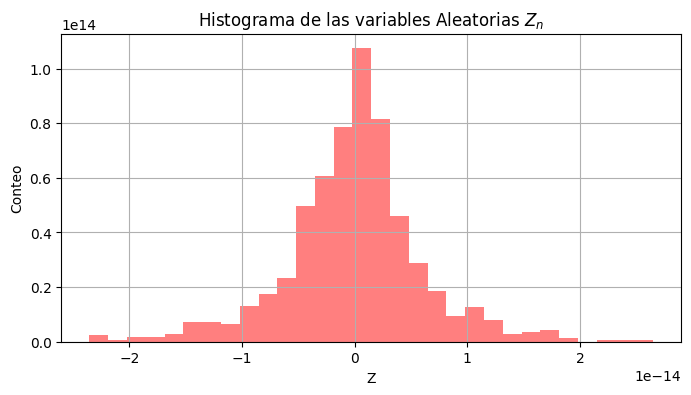

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(variablesZetas, bins=30, density=True, alpha=0.5, color='red', label='Histograma')
plt.title('Histograma de las variables Aleatorias $Z_n$')
plt.ylabel("Conteo")
plt.xlabel("Z")
plt.grid(True)
plt.show()

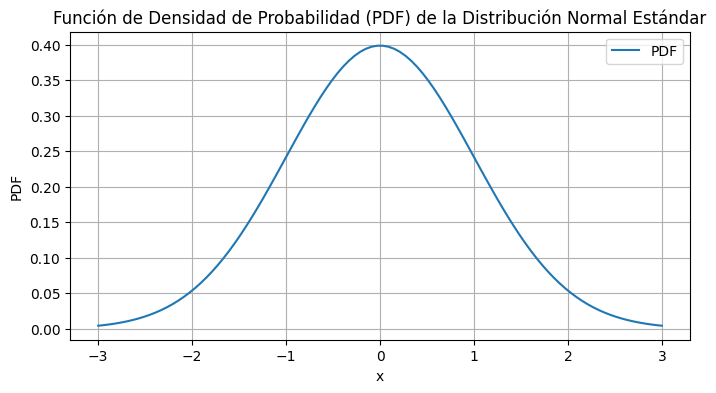

In [13]:
# Generar datos de la distribución normal estándar
mu = 0  # Media
sigma = 1  # Desviación estándar
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)  # Generar 100 puntos en el rango

# Calcular la función de densidad de probabilidad (PDF) para cada punto en x
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Crear el gráfico
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='PDF')
plt.title('Función de Densidad de Probabilidad (PDF) de la Distribución Normal Estándar')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

Ahora en la gráfica se va a incluir la función de densidad de una variable aleatoria normal con media 0 y varianza 1. y notamos que el histograma de arriba se ajusta bien a la función de densidad de abajo. En este ejemplo no pudimos ajustar bien la escala de valores, ya que si queremos graficar el histograma y la función de densidad normal, se ve aplastada la función de densidad y los valores del histograma no se notan. Esto es gracias a la diferencia de valores de ambas funciones

Haremos la prueba para otros valores. $ \alpha = 7$ y $k = 1$

In [14]:
alpha, k = 7., 1. 
variablesZetas = []
for i in range(0, 1000):
    muestra1 = np.random.pareto(alpha, 1000) + k
    #Estimación muestral para calcular la esperanza y varianza
    mu1 = (alpha*k)/(alpha - 1)
    sigma1 = alpha*(k**2)/(((alpha - 1)**2)*(alpha - 1))
    variablesZetas.append(LimiteCentral(muestra1,mu1,sigma1))
#print(variablesZetas)

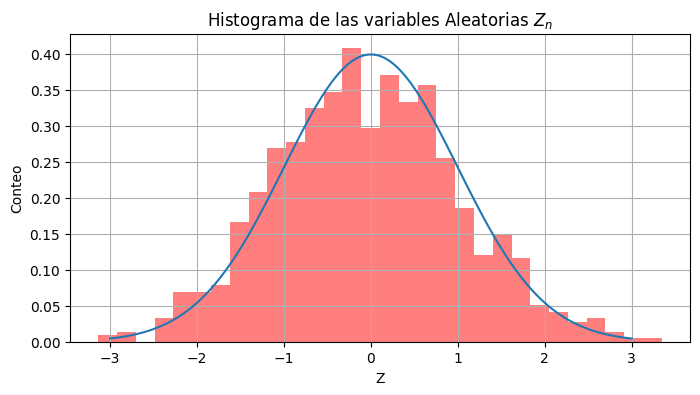

In [15]:
plt.figure(figsize=(8, 4))
plt.hist(variablesZetas, bins=30, density=True, alpha=0.5, color='red', label='Histograma')
plt.plot(x, pdf, label='PDF')
plt.title('Histograma de las variables Aleatorias $Z_n$')
plt.ylabel("Conteo")
plt.xlabel("Z")
plt.grid(True)
plt.show()

Y con la gráfica de arriba notamos que se ejemplifica basta bien el resultado del Teorema de limite Central, puesto que los datos simulados en el histograma se parecen bastante a la dendiad de una variable aleatoria normal estandar

Probando con más valores, $ \alpha = 15$ y $k = 3$

In [16]:
alpha, k = 14., 1. 
variablesZetas = []
for i in range(0, 1000):
    muestra1 = np.random.pareto(alpha, 1000) + k
    #Estimación muestral para calcular la esperanza y varianza
    mu1 = (alpha*k)/(alpha - 1)
    sigma1 = alpha*(k**2)/(((alpha - 1)**2)*(alpha - 1))
    variablesZetas.append(LimiteCentral(muestra1,mu1,sigma1))
#print(variablesZetas)

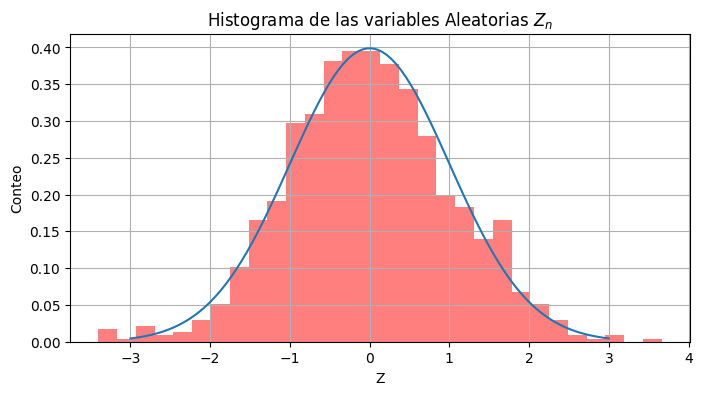

In [17]:
plt.figure(figsize=(8, 4))
plt.hist(variablesZetas, bins=30, density=True, alpha=0.5, color='red', label='Histograma')
plt.plot(x, pdf, label='PDF')
plt.title('Histograma de las variables Aleatorias $Z_n$')
plt.ylabel("Conteo")
plt.xlabel("Z")
plt.grid(True)
plt.show()

Concluyendo el ejercicio la simulación es de bastante ayuda para notar que el histograma de nuestros datos  se aproximan a la densidad teorica de una distribución normal estandar.

# Ejercicio 3
En el ejercicio 2 de la práctica 1, estudiamos la relación entre el diametro y la altura de cierto tipo de pino.  Supongamos ahora que el diámetro $D$ es una variable aleatoria, con densidad de probabilidad 
$$ f_{D}(x)=\frac{x}{1250}\mathbb{1}_{(0,50)}\left( x\right) $$
Tomando en cuenta la relación encontrada en el ejercicio 2, utilice el metodo de Montecarlo para aproximar vía histogramas la gráfica de la densidad de probabilidad de la altura de los pinos, y aproximar la altura media de dichos arboles.

Recordando el modelo que propusimos en la Práctica 1

$$ y = kx^{b}$$
con $k = 2.85013297$ y $b = 0.07490765$

Comenzamos trabajando de la siguiente manera, como conocemos la función de densidad del diametro nos corresponde integrarla para obtener la función de acumulación :
$$F_{D}(z) = \mathbb{P}_{D}\left[(-\infty, z]  \right]  = \int_{\infty}^{z}f_{D}(u )du$$

Y tenemos los siguientes casos:
- si  $z < 0 \implies F_{D}(z) = 0$
- si $ z > 50$ o $z = 50$ entonces $F_{D}(z) = 1$
- Lo que nos interesa es cuando $z$ se encuentra entre 0 y 50 que es $F_{D}(z) = \frac{z^{2}}{2500}$

Ahora al sacar la inversa de esa función:

$ u =  \frac{z^{2}}{2500}  \implies F_{D}^{-1}(u) = 50\sqrt(u)$

Se procede a hacer la implementación:



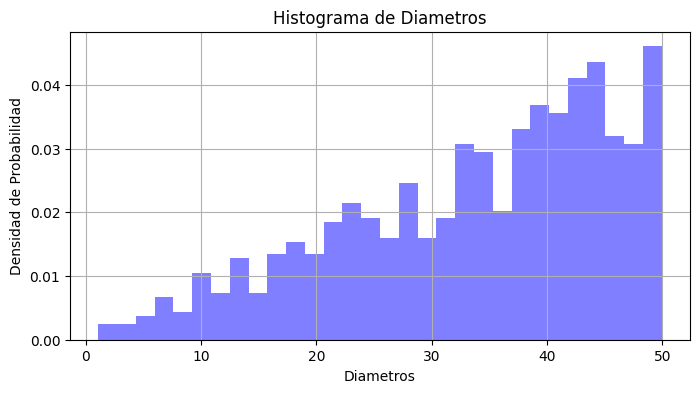

In [32]:
num_muestras = 1000
muestras_diametro = []
for i in range(num_muestras):
    u = random.random()# Generando a numeros aleatorios entre 0 y 1
    muestras_diametro.append(50*math.sqrt(u))
'''Prodecemos a hacer el histograma de diametros'''
plt.figure(figsize=(8, 4))
plt.hist(muestras_diametro, bins=30, density=True, alpha=0.5, color='blue', label='Histograma')
plt.title('Histograma de Diametros')
plt.ylabel("Densidad de Probabilidad")
plt.xlabel("Diametros")
plt.grid(True)
plt.show()

En base a la relación del diametro y y la altura vamos a generar un histograma para la altura

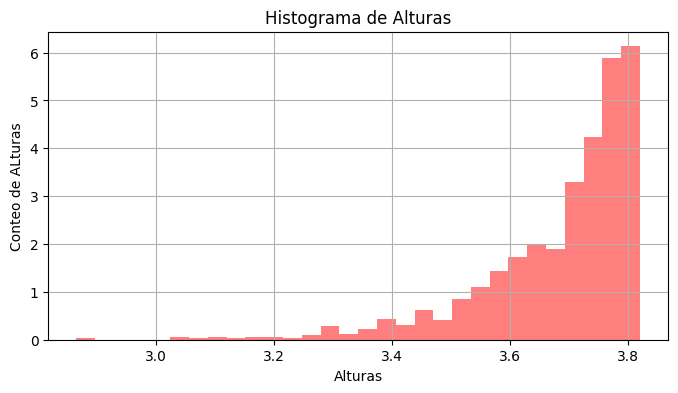

In [33]:
k =  2.85013297
b = 0.07490765
def Modelo(diametro):
    return k* (diametro**b)

muestras_altura = [Modelo(i) for i in muestras_diametro]
'''Prodecemos a hacer el histograma de Alturas'''
plt.figure(figsize=(8, 4))
plt.hist(muestras_altura, bins=30, density=True, alpha=0.5, color='red', label='Histograma')
plt.title('Histograma de Alturas')
plt.ylabel("Conteo de ALturas")
plt.xlabel("Alturas")
plt.grid(True)
plt.show()

Y pues del histograma  que los datos describen bastante bien la función del modelo al que llegamos en la práctica 1. Lo último que falta ver es la media de altura de los arboles que en el histograma se ve que está entre 3.0 y 3.5. Para ser más exactos usamos la función de numpy, a continuación se presenta el cálculo y con eso concluímos el ejercicio.

In [35]:
print(f'Y concluyendo que la altura media de los árboles es {np.mean(muestras_altura)}')

Y concluyendo que la altura media de los árboles es 3.685325389819628
